# Homework 4 - Manifold Learning

This is an individual assignment.

**Due: Friday, April 3, 11:59 PM**

## Grading Rubric

1. **Problem 1 (60 pts)**
    * Code implementation of MDS (20 pts)
    * Code implementation of ISOMAP (20 pts)
    * Code implementation of LLE (20 pts)
    
2. **Problem 2 (40 pts)** 
    * You've used your code to projected all provided data sets to 2-D and provided the appropriated discussions

**Total: 100 pts**

# Manifold Learning

In this assignment, you will explore manifold learning. You have been given 3 data sets with varying original dimensionality in each.

1. **Clusters Data Set:** (or "Gaussian clouds) this data set is 10-dimensional. **Goal:** It contains three groups of data that where each group should be classified into separate classes.

2. **Swiss Roll Data Set:** this data set is 3-dimensional. **Goal:** One group of data where neighboring points on the surface should remain neighbors after dimensionality reduction and points far on the surface should remain far from each other after dimensionality reduction.

3. **Half moons Data Set:** this data is 3-dimensional. **Goal:** Two groups of data that where each group should be classified into a separate class.

Here are the data sets:

Clusters Data Set: (600, 10)
Swissroll Data Set:  (500, 3)
Halfmoons Data Set:  (500, 3)


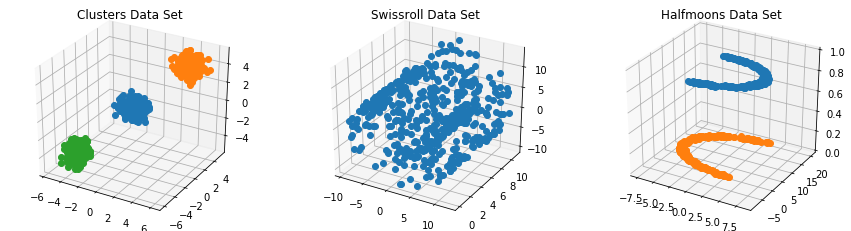

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15, 4))

#Load Clusters
clusters = np.loadtxt('clusters.txt') 
X1_labels = clusters[:,10] 
X1 = clusters[:,0:10]
print('Clusters Data Set:', X1.shape)
ax = fig.add_subplot(131, projection='3d')
for i in range(1,4):
    ax.plot3D(X1[X1_labels==i,0],X1[X1_labels==i,1], X1[X1_labels==i,2],'o');
plt.title('Clusters Data Set');

# Load Data Swissroll
X2 = np.loadtxt('swissroll.txt') 
print('Swissroll Data Set: ', X2.shape)
ax = fig.add_subplot(132, projection='3d')
ax.plot3D(X2[:,0],X2[:,1], X2[:,2],'o');
plt.title('Swissroll Data Set');

#Load Halfmoons
halfmoons = np.loadtxt('halfmoons.txt') 
X3_labels = halfmoons[:,3] 
X3 = halfmoons[:,0:3]
print('Halfmoons Data Set: ',X3.shape)
ax = fig.add_subplot(133, projection='3d')
for i in range(1,4):
    ax.plot3D(X3[X3_labels==i,0],X3[X3_labels==i,1], X3[X3_labels==i,2],'o');
plt.title('Halfmoons Data Set');

# Problem 1

Implement classic MDS, ISOMAP and LLE. 

You should implement these models from scratch. To aid you in this implementation, you can use the follwing functions:

* ```NearestNeighbors``` from the module ```sklearn.neighbors```. This will help in computing neighbors of points.
* ```pdist``` from ```scipy.spatial.distance```. This will help computing pairwise distances between points. 
* ```squareform``` from ```scipy.spatial.distance```. This will help converting the pairwise distances into a square matrix.
* ```numpy``` library (includes linear algebra modules).

# Problem 2

Using your code, project each data set down to 2-dimensions using classic MDS, ISOMAP and LLE.

Include a discussion describing whether you think MDS, ISOMAP and LLE are able to identify the intrinsic "manifold" structure of the data with an explanation of why or why not. Be sure this discussion addresses the "goal" of the data set outlined above.

## Submit your Solution

Create a PDF of the notebook with your solutions.

Submit both your notebook and the PDF of your notebook to Homework 4 assignment page on Canvas.

* For full credit consideration, make sure all output cells do not show any errors and all code is visible.

In [119]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import numpy as np
from numpy import linalg as LA
from sklearn.manifold import MDS
import sys
import warnings
warnings.filterwarnings('ignore')
from sklearn.manifold import Isomap
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import LocallyLinearEmbedding

## MDS Code Implementation

In [10]:
# Compute the distance matrix
# Matrix that stores pairwise distances of each other
# Compute for X1 initially
def MDS_user(X1):
    D = pdist(X1, metric='euclidean')
    D = squareform(D, force='no', checks=True)
    D2 = np.square(D)
    N = len(D)
    one = np.ones(N)
    L = one@one.T
    res = np.array([ [ 1 for i in range(N) ] for j in range(N) ] )
    J = np.identity(N)-res/N
    B = -J@D2@J/2
    e_val, e_vec = LA.eig(B)
    e_val = abs(e_val)
    idx = e_val.argsort()[::-1]   
    eigenValues = e_val[idx]
    eigenVectors = e_vec[:,idx]
    eigen_vectors = eigenVectors[:,:2]
    eigen_values = np.diag(eigenValues[:2])
    Y = eigen_vectors@np.sqrt(eigen_values)
    return Y


## MDS Visualization on Clusters DataSet

Text(0.5, 1.0, 'MDS on Clusters Dataset')

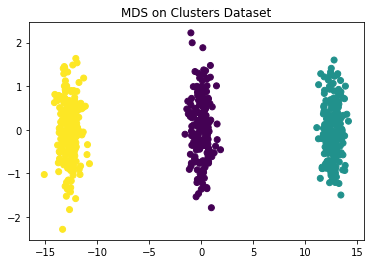

In [360]:
Z = MDS_user(X1)
plt.scatter(Z[:,0],Z[:,1],c = X1_labels)
plt.title("MDS on Clusters Dataset")

## MDS Visualization on Swiss Roll Dataset

Text(0.5, 1.0, 'MDS on Swiss Roll Dataset')

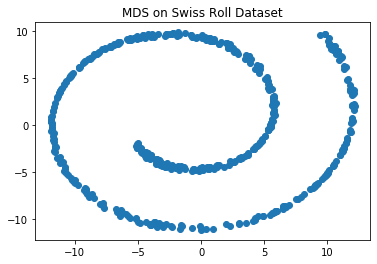

In [349]:
Z = MDS_user(X2)
plt.scatter(Z[:,0],Z[:,1])
plt.title("MDS on Swiss Roll Dataset")

## MDS Visualization on Half-Moon Dataset

Text(0.5, 1.0, 'MDS on Halfmoon Dataset')

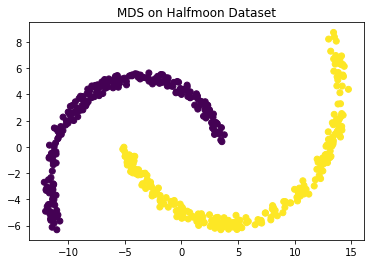

In [350]:
Z = MDS_user(X3)
plt.scatter(Z[:,0],Z[:,1], c= X3_labels)
plt.title("MDS on Halfmoon Dataset")

## Observation based on MDS

As one can observe from the above figures that MDS maintains the pairwise distances of each of these points even in the lower dimensional space. 
Here are certain important observations with respect to the different types of data:
1. Clustered Data: The clustered data remains clustered even in the lower dimensional space and the goal of seperating each group to different classes is achieved using MDS. Also MDS is able to identify the intrinsic manifold of the data.
2. Swiss Roll Data : MDS assumes a linear manifold however, the swiss roll data lies in a non linear manifold, thus MDS would not be able to identify the intrinsic manifold of the data. Moreover, since we project all the points on a linear manifold, the goal of neighboring points being close to each other and points that are far in 3 dimensional will remain far in 2 dimension would not be achieved using MDS.
3. Half Moon Dataset: Even here, MDS assumes a linear manifold, however, the data is on a non linear manifold, thus MDS would not be able to learn the intrinsic manifold. However it is able to seperate the 2 groups of data as one can see in the plots above.

## FloydWarshal Algorithm

In [18]:
def FloydWarshal(distance):
    N = len(distance)
    for k in range(N):
        for i in range(N):
            for j in range(N):
                if(distance[i][k]+distance[k][j]<distance[i][j]):
                    distance[i][j] = distance[i][k]+distance[k][j]
    return distance
    

## IsoMap Code Implementation

In [111]:
def IsoMap_user(data,neighbors,no):
    if no == 1:
        data_label = X1_labels
    if no == 3:
        data_label = X3_labels
    nbrs = NearestNeighbors(n_neighbors=neighbors, algorithm='auto').fit(data)
    distances, indices = nbrs.kneighbors(data)
    N = len(indices)
    M = len(indices[0])
    Dg = np.array([ [ np.inf for i in range(N) ] for j in range(N) ])
    for i in range(N):
        for j in range(M):
            z=indices[i][j]
            Dg[i][z] = distances[i][j]
    DG = FloydWarshal(Dg)
    #print(Dg)
    res = np.array([ [ 1 for i in range(N) ] for j in range(N) ] )
    J = np.identity(N)-res/N
    B = -J@DG**2@J/2
    e_val, e_vec = LA.eig(B)
    e_val = abs(e_val)
    idx = e_val.argsort()[::-1]   
    eigenValues = e_val[idx]
    eigenVectors = e_vec[:,idx]
    eigen_vectors = eigenVectors[:,:2]
    eigen_values = np.diag(eigenValues[:2])
    Y = eigen_vectors@np.sqrt(eigen_values)
    return Y

## ISOMAP on Clustered Dataset 

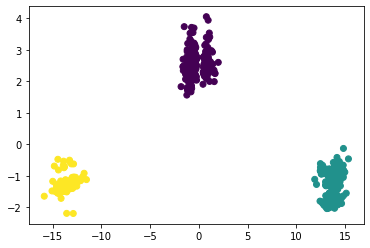

In [351]:
Z = IsoMap_user(X1,201,2)
plt.scatter(Z[:,0],Z[:,1], c= X1_labels)

## Observations ISOMAP on clustered data set
As one can observe that although ISOMAP computes the geodesic distances, we have kept the number of neighbors for the clustered data set to be very large. Thus it can learn the intrinsic manifold when the number of neighbors are large. Since the number of neighbors we used for the clustered data set is very large, ISOMAP behaves as a MDS and thus the goal of clustering the clustered data set in lower dimension is achieved using ISOMAP as well but with a high value of number of neighbors. However, the issue with this is the high time complexity of ISOMAP.

## ISOMAP on SwissRoll Dataset

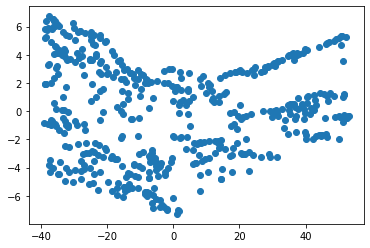

In [343]:
Z = IsoMap_user(X2,12,2)
plt.scatter(Z[:,0],Z[:,1])

## Observation on Swiss Roll Dataset using ISOMAP
1. ISOMAP computes the geodesic distance and that is why ISOMAP would be able to unwrap the data and learn the intrinsic manifold of the swiss roll data.
2. In the lower dimensional space, ISOMAP preserves the geodesic distance and not the euclidean distance. Thus, the holes and the spaces in the data set would not affect ISOMAP.
4. Although, ISOMAP might not be able to preserve the local geometry as good as LLE, it does a fair amount of work in preserving the geometry of the data points in lower dimensional space.
5. So, to summarize we say that although ISOMAP does a good amount of work to satisfy the goal of swiss roll dataset, it's not as good as the LLE in terms of preserving the neighbor hood of each data point.

## ISOMAP on Halfmoon Dataset

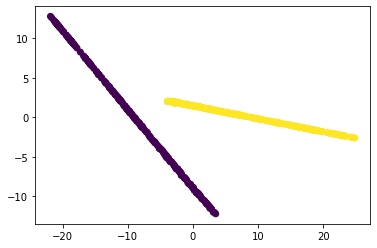

In [355]:
Z = IsoMap_user(X3,60,2)
plt.scatter(Z[:,0],Z[:,1], c= X3_labels)

## Observations of ISOMAP on half moon data set
ISOMAP works well for non-linear manifolds. ISOMAP considers the euclidean distance of the neighboring points assuming that the neighboring points are on a linear manifold and then computes the distance for all other points with respect to those neighboring points. ISOMAP learns the intrinsic manifold for the halfmoon data set. Thus, ISOMAP ideally unwraps the manifold it also satisfies the goal of classifying the half moon data set.

## LLE Code Implementation

In [303]:
def LLE_algo(k,data):
    neigh = NearestNeighbors(k)
    neigh.fit(data)
    _,id=neigh.kneighbors(data)
    N = len(data)
    M = len(data[0])
    id=id[:,1:]
    W = np.matrix(np.ones((N,N)) * 0)
    for i in range(N):
        v = np.matrix(np.ones((k-1,M)))
        for j in range(k-1):
            v[j] = data[id[i][j]]
        V=v.T       
        xi = []
        for j in range(k-1):
            xi.append(data[i])
        xi=np.array(xi)
        xi=xi.T
        G=(xi-V).T@(xi-V)
        wi = np.linalg.inv(G).dot(np.ones(k-1))
        wi=wi/np.sum(wi)
        wi=wi.T
        for j in range(len(id[0])):
            W[i,id[i,j]] = wi[j]
    M=(np.eye(N) - W.T)@((np.eye(N)-W.T).T)
   
    eigen_vals, eigen_vecs = np.linalg.eigh(M)
    for z in range(len(eigen_vals)):
        if eigen_vals[z]<0:
            eigen_vals[z] = abs(eigen_vals[z])
    
    #eigen_vals = abs(eigen_vals)
    idx = np.argsort(eigen_vals)
    eigen_vals = eigen_vals[idx]
    eigen_vecs = eigen_vecs[:,idx]
    eigen_vecs = eigen_vecs[:,1:]
    y = eigen_vecs[:,:2]
    return np.array(y)

## LLE on clustered dataset

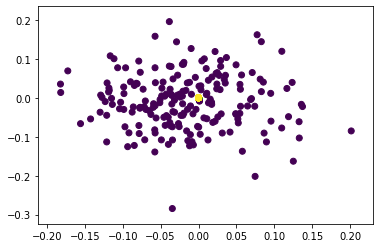

In [328]:
Y = LLE_algo(60,X1)
plt.scatter(Y[:,0],Y[:,1], c=X1_labels)

## Observations of LLE on clustered data set.
1. LLE is a method used for dimensionality reduction of non-linear manifolds. However, the clustered data set is a linear manifold. Due to this LLE is not able to learn the intrinsic manifold of the data.
2. Moreover, LLE assumes a linear manifold for its neighboring points, since there are certain regions in the clustered data set where neighboring area is not a linear manifold, our assumption goes wrong in that case. Thus we are unable to classify group of data here. 

## LLE on Swiss Roll Dataset

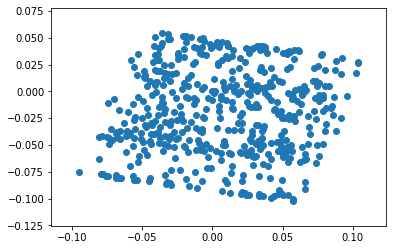

In [305]:
Y = LLE_algo(50,X2)
plt.scatter(Y[:,0],Y[:,1])

## Observations of LLE on Swiss Roll Data Set
1. LLE can learn a non-linear manifold and maintain the geometry of the data points on the lower dimension.
2. Since swiss roll lies on a non-linear manifold, LLE is able to learn the intrinsic manifold of the data.
3. The goal of swiss roll data set is to be able to maintain the geometry and the neighbor points which LLE is able to satisfy.

## LLE on Halfmoon Dataset

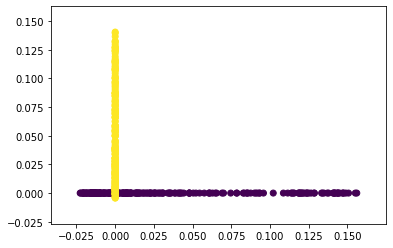

In [358]:
Y = LLE_algo(21,X3)
plt.scatter(Y[:,0],Y[:,1], c= X3_labels)

## Observations of LLE on Half moon data set:
1. The half moon data set is on a non linear manifold. 
2. The local geometry of each data point in the lower dimension is preserved. 
3. LLE assumes that the data would be locally linear however, in this data set, there might be cases where the data would not be locally linear especially due to the gaps between the 2 half moons. 
4. Thus since this assumption fails here, the goal of classifying the 2 half moons would not be satisfied using LLE.
5. So, to summarize, LLE does learn the non linear manifold, however, it considers the geometry to be locally linear which might not be true in this case and thus the goal is not satisfied using LLE